<h1>One Hot Encoding</h1>

<h3>data reading and cleaning</h3>

In [1]:
import pandas as pd
df = pd.read_csv("carprices.csv")

df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [12]:
df = pd.concat([df,pd.get_dummies(df["Car Model"])],axis="columns")

In [32]:
df = df.drop(["Car Model","Mercedez Benz C class"], axis="columns")

<h3>data plotting</h3>

In [15]:
import seaborn as sns

<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

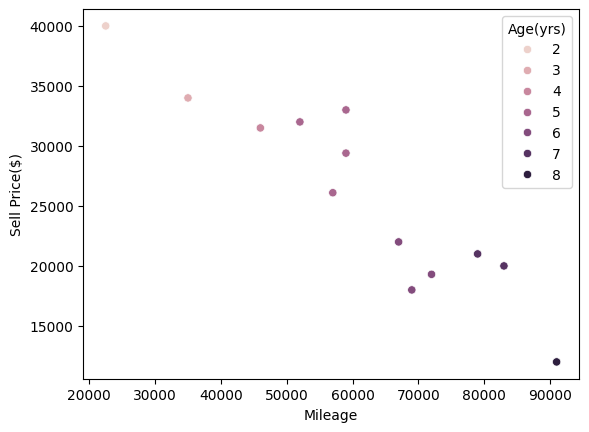

In [33]:
sns.scatterplot(x=df["Mileage"],y=df["Sell Price($)"],data=df, hue=df["Age(yrs)"])

<h3>features selection</h3>

In [35]:
y = df["Sell Price($)"]
x = df.drop("Sell Price($)", axis="columns")
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,False,True
1,35000,3,False,True
2,57000,5,False,True
3,22500,2,False,True
4,46000,4,False,True
5,59000,5,True,False
6,52000,5,True,False
7,72000,6,True,False
8,91000,8,True,False
9,67000,6,False,False


<h3>data transformation and fitting</h3>

In [78]:
import numpy as np

In [ ]:
x = x.to_numpy()
y = y.to_numpy()

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2)

In [97]:
X_train

array([[79000, 7, False, False],
       [91000, 8, True, False],
       [59000, 5, True, False],
       [22500, 2, False, True],
       [52000, 5, True, False],
       [67000, 6, False, False],
       [57000, 5, False, True],
       [83000, 7, False, False],
       [72000, 6, True, False],
       [46000, 4, False, True]], dtype=object)

<h3>Model-1 (Linear regression)</h3>

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [101]:
model.fit(X_train, Y_train)

LinearRegression()

In [102]:
model.predict(np.array([[69000,6,False,True]]))

array([20440.60648472])

In [103]:
model.score(X_test, Y_test)

0.8313510584704432

<h3>Model-2 (Random Forest)</h3>

In [104]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [105]:
model2.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [106]:
model2.predict(np.array([[69000,6,False,True]]))

array([22103.])

In [107]:
model2.score(X_test, Y_test)

0.708715622406639